In [1]:
# import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

loading data

1. We use panda's read_csv to read train.csv into a dataframe.
2. Then we separate our images and labels for supervised learning.
3. We also do a train_test_split to break our data into two sets, one for training and one for testing. This let's us measure how well our model was trained by later inputting some known test data.

In [2]:
dataset=pd.read_csv('./train.csv') # import the data

For the sake of time, we're only using 5000 images. You should increase or decrease this number to see how it affects model training.

In [3]:
images=dataset.iloc[0:5000,1:]
labels=dataset.iloc[0:5000,:1]

In [18]:
dataset.shape

(42000, 785)

In [4]:
images.shape

(5000, 784)

In [5]:
labels.shape

(5000, 1)

In [6]:
train_images,test_images,train_labels,test_labels=train_test_split(images,labels,random_state=2,train_size=0.8)

/home/subash/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Viewing the image

1. Since the image is currently one-dimension, we load it into a numpy array and reshape it so that it is two-dimensional (28x28 pixels)
2. Then, we plot the image and label with matplotlib

#### You can change the value of variable i to check out other images and labels.

Text(0.5,1,'label    9\nName: 936, dtype: int64')

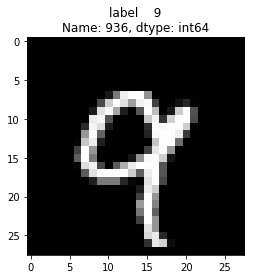

In [7]:
i=1
img=train_images.iloc[i].as_matrix()
img=img.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i])

# trained the model

1. First, we use the sklearn.neighbors module to create a neighbour classifier.
2. Next, we pass our training images and labels to the classifier's fit method, which trains our model.
3.Finally, the test images and labels are passed to the score method to see how well we trained our model. Fit will return a float between 0-1 indicating our accuracy on the test data set

In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(train_images,train_labels.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
predictions=clf.predict(test_images)

In [11]:
print(predictions)

[4 6 9 4 1 4 3 6 5 7 4 7 9 3 0 6 6 6 7 1 1 0 7 1 4 9 6 4 7 1 9 8 1 8 7 1 1
 5 9 8 3 6 6 5 0 0 9 7 3 5 9 4 9 7 7 9 7 1 9 4 4 7 9 8 9 6 3 8 1 8 5 6 4 0
 4 1 9 6 4 2 2 2 9 9 4 6 8 9 4 8 7 3 9 8 2 3 5 5 2 0 4 9 9 6 0 0 2 7 1 9 5
 8 3 8 6 8 4 0 7 8 1 8 7 3 0 5 7 7 5 1 1 1 6 7 7 1 7 9 9 5 1 0 9 7 3 9 6 1
 2 8 9 7 8 7 3 8 9 3 7 7 0 9 3 5 4 6 6 2 1 8 2 2 4 0 9 2 4 9 9 0 4 6 5 5 4
 7 1 0 0 0 6 7 7 4 9 1 6 4 0 1 7 9 7 9 5 5 8 3 3 6 6 6 1 0 9 5 0 5 2 6 6 1
 9 6 9 2 6 5 9 9 7 6 0 7 5 1 1 3 6 1 4 0 6 0 7 2 0 0 3 5 0 0 2 2 1 1 6 5 4
 7 7 4 1 2 5 4 2 1 0 4 1 6 7 1 6 8 2 0 6 1 2 9 8 7 1 6 5 5 1 6 2 7 2 3 2 1
 6 7 3 6 0 1 5 3 3 6 9 4 1 2 4 0 0 5 6 2 5 4 9 2 5 0 6 3 6 8 6 4 0 3 5 6 0
 9 3 4 8 4 3 3 2 4 2 4 5 7 2 3 7 1 2 8 4 9 6 7 4 3 7 0 7 7 1 5 4 1 4 1 2 5
 5 4 3 7 5 9 4 2 1 3 2 5 4 0 3 7 9 2 7 9 2 1 5 2 7 2 3 9 4 7 4 9 0 9 0 6 7
 4 6 6 7 1 6 0 9 3 7 6 0 6 0 0 5 1 8 3 2 4 4 6 9 7 1 0 2 8 3 4 7 1 5 0 2 8
 1 1 9 2 2 6 2 2 0 7 3 7 1 5 8 9 7 0 5 4 5 3 2 5 2 6 1 3 3 9 5 0 1 4 5 4 6
 3 4 6 0 2 0 1 4 6 0 9 1 

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels,predictions))

0.926


# Loaded test_data

we can load and predict the unlabeled data from test.csv

In [13]:
testd=pd.read_csv('./test.csv')
result=clf.predict(testd)

In [14]:
print(result)

[2 0 9 ... 3 9 2]


In [15]:
result

array([2, 0, 9, ..., 3, 9, 2])

In [16]:
result.shape

(28000,)

In [17]:
testd.shape

(28000, 784)